<a href="https://colab.research.google.com/github/Akshat-Srivastava-IITK12/-250096-_2.1.ipynb/blob/main/%7B250096%7D_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()
file_path='Dataset_1.xlsx'

Saving Dataset_1.xlsx to Dataset_1.xlsx


Enter Area of House : 3000
Enter number of rooms : 5
Predicted Price :  998.5259129077111


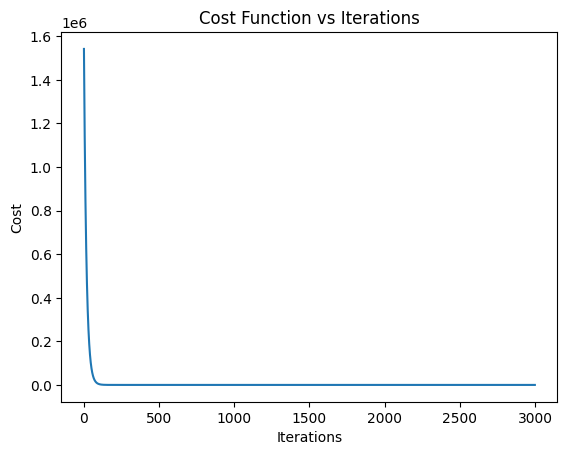

In [11]:
d = pd.read_excel("Dataset_1.xlsx")
X = d[["House Area", "Number of rooms"]].values
Y = d["Price"].values.reshape(-1,1)
m = X.shape[0]
X_bias = np.hstack((np.ones((m, 1)), X))
theta = np.zeros((3, 1))
def predict(X, theta):
    return X @ theta
def cost_function(X, Y, theta):
    m = len(Y)
    return (1 / (2 * m)) * np.sum((predict(X, theta) - Y) ** 2)
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = []
    m = len(Y)
    for i in range(iterations):
        gradients = (1 / m) * X.T @ (predict(X, theta) - Y)
        theta = theta - alpha * gradients
        cost_history.append(cost_function(X,Y,theta))
    return theta, cost_history
alpha = 1e-9
iterations = 3000
theta_final, CostH = gradient_descent(X_bias, Y, theta, alpha, iterations)
new_area = int(input("Enter Area of House : "))
new_rooms = int(input("Enter number of rooms : "))
new_house = np.array([[1, new_area, new_rooms]])
predicted_price = new_house @ theta_final
print("Predicted Price : ", predicted_price[0][0])
plt.plot(CostH)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.show()